In [3]:
#maite's branch file

In [1]:
#Importing dependencies and setup
import requests
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

#import spotify keys
from config import client_id
from config import client_secret

In [2]:
#from: https://stmorse.github.io/journal/spotify-api.html

AUTH_URL = 'https://accounts.spotify.com/api/token'

# POST
auth_response = requests.post(AUTH_URL, {
    'grant_type': 'client_credentials',
    'client_id': client_id,
    'client_secret': client_secret,
})

# convert the response to JSON
auth_response_data = auth_response.json()

# save the access token
access_token = auth_response_data['access_token']

In [3]:
#from: https://stmorse.github.io/journal/spotify-api.html

#base URL for Spotify API
base_url = 'https://api.spotify.com/v1/'

#In order to access, we send a properly formed GET request to the API server, with our access_token in the header. Let’s save this header info now, in the following very specific format:
headers = {
    'Authorization': 'Bearer {token}'.format(token=access_token)
}

In [4]:
#import global top songs csv
global_songs_df = pd.read_csv("resources/global-weekly-2022-06-02.csv")

#extracting track id (removing "spotify:track:")
track_id_series = global_songs_df.uri.str[14:]

#convert to df and rename column
track_id_df = track_id_series.to_frame().rename(columns={"uri":"track_id"})

#merge dfs
cleaned_global_df = global_songs_df.merge(track_id_df, how="inner", left_index=True, right_index=True)

#pare down columns
cleaned_global_df = cleaned_global_df[["rank", "track_id", "artist_names", "track_name", "peak_rank", "previous_rank", "weeks_on_chart", "streams"]]
cleaned_global_df.head()

,rank,track_id,artist_names,track_name,peak_rank,previous_rank,weeks_on_chart,streams
0,1,4Dvkj6JhhA12EX05fT7y2e,Harry Styles,As It Was,1,1,9,60420855
1,2,6Sq7ltF9Qa7SNFBsV5Cogx,"Bad Bunny, Chencho Corleone",Me Porto Bonito,2,4,4,39026161
2,3,3k3NWokhRRkEPhCzPmV8TW,"Bad Bunny, Bomba Estéreo",Ojitos Lindos,3,3,4,37623538
3,4,75FEaRjZTKLhTrFGsfMUXR,Kate Bush,Running Up That Hill (A Deal With God) - 2018 ...,4,-1,1,32763806
4,5,1IHWl5LamUGEuP4ozKQSXZ,Bad Bunny,Tití Me Preguntó,5,9,4,31126704


In [5]:
#empty lists to store song data
danceability = []
energy = []
key = []
loudness = []
mode = []
speechiness = []
acousticness = []
instrumentalness = []
liveness = []
valence = []
tempo = []
id_num = []
track_href = []
analysis_url = []
duration_mins = []
time_signature = []

In [6]:
for t in cleaned_global_df["track_id"]:
    response = requests.get(base_url + 'audio-features/' + t, headers=headers).json()
    
    #fill in track info for each audio feature / empty list
    danceability.append(response["danceability"])
    energy.append(response["energy"])
    key.append(response["key"])
    loudness.append(response["loudness"])
    mode.append(response["mode"])
    speechiness.append(response["speechiness"])
    acousticness.append(response["acousticness"])
    instrumentalness.append(response["instrumentalness"])
    liveness.append(response["liveness"])
    valence.append(response["valence"])
    tempo.append(response["tempo"])
    id_num.append(response["id"])
    track_href.append(response["track_href"])
    analysis_url.append(response["analysis_url"])    
    #duration recorded in api in milliseconds, converting to minutes here
    duration_mins.append(round((response["duration_ms"] / 60000),2))
    time_signature.append(response["time_signature"])
    

In [7]:
songs_dict = {
    "track_id": id_num,
    "danceability": danceability,
    "energy": energy,
    "key": key,
    "loudness": loudness,
    "mode": mode,
    "speechiness": speechiness,
    "acousticness": acousticness,
    "instrumentalness": instrumentalness,
    "liveness": liveness,
    "valence": valence,
    "tempo": tempo,
    "duration_mins": duration_mins,
    "time_signature": time_signature,
    "track_href": track_href,
    "analysis_url": analysis_url
    
}

song_info_df = pd.DataFrame(songs_dict)
song_info_df.head()

,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_mins,time_signature,track_href,analysis_url
0,4Dvkj6JhhA12EX05fT7y2e,0.520,0.731,6,-5.338,0,0.0557,0.3420,0.001010,0.3110,0.662,173.930,2.79,4,https://api.spotify.com/v1/tracks/4Dvkj6JhhA12...,https://api.spotify.com/v1/audio-analysis/4Dvk...
1,6Sq7ltF9Qa7SNFBsV5Cogx,0.911,0.712,1,-5.105,0,0.0817,0.0901,0.000027,0.0933,0.425,92.005,2.98,4,https://api.spotify.com/v1/tracks/6Sq7ltF9Qa7S...,https://api.spotify.com/v1/audio-analysis/6Sq7...
2,3k3NWokhRRkEPhCzPmV8TW,0.647,0.686,3,-5.745,0,0.0413,0.0800,0.000001,0.5280,0.268,79.928,4.30,4,https://api.spotify.com/v1/tracks/3k3NWokhRRkE...,https://api.spotify.com/v1/audio-analysis/3k3N...
3,75FEaRjZTKLhTrFGsfMUXR,0.629,0.547,10,-13.123,0,0.0550,0.7200,0.003140,0.0604,0.197,108.375,4.98,4,https://api.spotify.com/v1/tracks/75FEaRjZTKLh...,https://api.spotify.com/v1/audio-analysis/75FE...
4,1IHWl5LamUGEuP4ozKQSXZ,0.650,0.715,5,-5.198,0,0.2530,0.0993,0.000291,0.1260,0.187,106.672,4.06,4,https://api.spotify.com/v1/tracks/1IHWl5LamUGE...,https://api.spotify.com/v1/audio-analysis/1IHW...


In [8]:
full_track_data = cleaned_global_df.merge(song_info_df, how='inner', on="track_id")

In [9]:
full_track_data.head()

,rank,track_id,artist_names,track_name,peak_rank,previous_rank,weeks_on_chart,streams,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_mins,time_signature,track_href,analysis_url
0,1,4Dvkj6JhhA12EX05fT7y2e,Harry Styles,As It Was,1,1,9,60420855,0.520,0.731,...,0.0557,0.3420,0.001010,0.3110,0.662,173.930,2.79,4,https://api.spotify.com/v1/tracks/4Dvkj6JhhA12...,https://api.spotify.com/v1/audio-analysis/4Dvk...
1,2,6Sq7ltF9Qa7SNFBsV5Cogx,"Bad Bunny, Chencho Corleone",Me Porto Bonito,2,4,4,39026161,0.911,0.712,...,0.0817,0.0901,0.000027,0.0933,0.425,92.005,2.98,4,https://api.spotify.com/v1/tracks/6Sq7ltF9Qa7S...,https://api.spotify.com/v1/audio-analysis/6Sq7...
2,3,3k3NWokhRRkEPhCzPmV8TW,"Bad Bunny, Bomba Estéreo",Ojitos Lindos,3,3,4,37623538,0.647,0.686,...,0.0413,0.0800,0.000001,0.5280,0.268,79.928,4.30,4,https://api.spotify.com/v1/tracks/3k3NWokhRRkE...,https://api.spotify.com/v1/audio-analysis/3k3N...
3,4,75FEaRjZTKLhTrFGsfMUXR,Kate Bush,Running Up That Hill (A Deal With God) - 2018 ...,4,-1,1,32763806,0.629,0.547,...,0.0550,0.7200,0.003140,0.0604,0.197,108.375,4.98,4,https://api.spotify.com/v1/tracks/75FEaRjZTKLh...,https://api.spotify.com/v1/audio-analysis/75FE...
4,5,1IHWl5LamUGEuP4ozKQSXZ,Bad Bunny,Tití Me Preguntó,5,9,4,31126704,0.650,0.715,...,0.2530,0.0993,0.000291,0.1260,0.187,106.672,4.06,4,https://api.spotify.com/v1/tracks/1IHWl5LamUGE...,https://api.spotify.com/v1/audio-analysis/1IHW...


In [10]:
temp_songs_df = full_track_data[["rank", "artist_names", "track_name", "weeks_on_chart", "streams", "danceability", "energy", "liveness"]]
temp_songs_df

,rank,artist_names,track_name,weeks_on_chart,streams,danceability,energy,liveness
0,1,Harry Styles,As It Was,9,60420855,0.520,0.731,0.3110
1,2,"Bad Bunny, Chencho Corleone",Me Porto Bonito,4,39026161,0.911,0.712,0.0933
2,3,"Bad Bunny, Bomba Estéreo",Ojitos Lindos,4,37623538,0.647,0.686,0.5280
3,4,Kate Bush,Running Up That Hill (A Deal With God) - 2018 ...,1,32763806,0.629,0.547,0.0604
4,5,Bad Bunny,Tití Me Preguntó,4,31126704,0.650,0.715,0.1260
...,...,...,...,...,...,...,...,...
195,196,"David Guetta, Becky Hill, Ella Henderson",Crazy What Love Can Do,4,5568564,0.601,0.713,0.1580
196,197,Tones And I,Dance Monkey,148,5556591,0.824,0.587,0.1490
197,198,Olivia Rodrigo,favorite crime,48,5552673,0.369,0.272,0.1470
198,199,"Blessd, Justin Quiles, Lenny Tavárez",Medallo,28,5552315,0.787,0.700,0.6630


In [11]:
new_songs_df = temp_songs_df.set_index('rank')

In [12]:
n_songs_df = new_songs_df.rename(columns={"artist_names":"Artist Names", "track_name":"Track Name", "weeks_on_chart":"Weeks on Chart"})

In [13]:
#Scatterplot for songs and danceability
danceability_df = n_songs_df[["Artist Names", "Track Name", "danceability"]]
danceability_df

,Artist Names,Track Name,danceability
rank,,,
1,Harry Styles,As It Was,0.520
2,"Bad Bunny, Chencho Corleone",Me Porto Bonito,0.911
3,"Bad Bunny, Bomba Estéreo",Ojitos Lindos,0.647
4,Kate Bush,Running Up That Hill (A Deal With God) - 2018 ...,0.629
5,Bad Bunny,Tití Me Preguntó,0.650
...,...,...,...
196,"David Guetta, Becky Hill, Ella Henderson",Crazy What Love Can Do,0.601
197,Tones And I,Dance Monkey,0.824
198,Olivia Rodrigo,favorite crime,0.369


In [15]:
dance_df = danceability_df.reset_index(drop=True)

In [18]:
dance_df()

,rank,Artist Names,Track Name,danceability
0,1,Harry Styles,As It Was,0.520
1,2,"Bad Bunny, Chencho Corleone",Me Porto Bonito,0.911
2,3,"Bad Bunny, Bomba Estéreo",Ojitos Lindos,0.647
3,4,Kate Bush,Running Up That Hill (A Deal With God) - 2018 ...,0.629
4,5,Bad Bunny,Tití Me Preguntó,0.650
...,...,...,...,...
195,196,"David Guetta, Becky Hill, Ella Henderson",Crazy What Love Can Do,0.601
196,197,Tones And I,Dance Monkey,0.824
197,198,Olivia Rodrigo,favorite crime,0.369
198,199,"Blessd, Justin Quiles, Lenny Tavárez",Medallo,0.787


The correlation between danceability and streams is (0.18656357599864287, 0.008165851893829125)


C:\Users\maite\AppData\Local\Temp/ipykernel_14424/2429176968.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_songs_df['danceability'] = pd.to_numeric(temp_songs_df['danceability'])
C:\Users\maite\AppData\Local\Temp/ipykernel_14424/2429176968.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_songs_df['streams'] = pd.to_numeric(temp_songs_df['streams'])


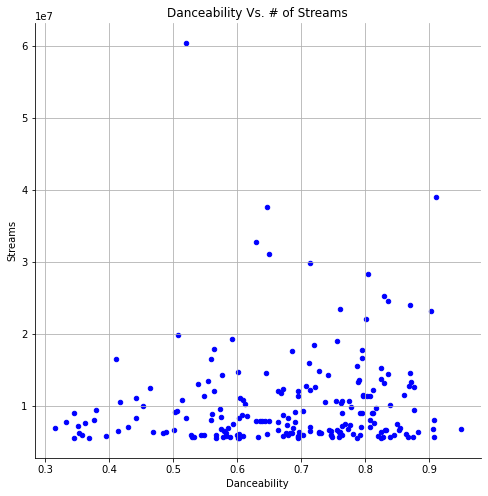

In [22]:
import scipy.stats as st
from matplotlib.pylab import rcParams
import seaborn as sns
rcParams['figure.figsize'] = 12,8
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

#Looking at the relationship between tempo and danceability of global top songs 

#make the columns in question numeric 
temp_songs_df['danceability'] = pd.to_numeric(temp_songs_df['danceability'])
temp_songs_df['streams'] = pd.to_numeric(temp_songs_df['streams'])

#create a scatter plot to see correlation between variables 
temp_songs_df.plot(kind="scatter", x="danceability", y="streams", c = ['blue'], grid=True, figsize=(8,8),
              title="Danceability Vs. # of Streams")

#find correlation between the variables and print
danceability = temp_songs_df.iloc[:,6]
streams = temp_songs_df.iloc[:,5]
correlation = st.pearsonr(danceability,streams)
print(f"The correlation between danceability and streams is {(correlation)}")

plt.xlabel('Danceability')
plt.ylabel('Streams')

#save the graph to the images folder 
plt.savefig('images/Danceability_vs_Streams')


#display the graph with the correlation number 

plt.show()

The correlation between energy and streams is (0.024157321189147415, 0.7341997432468818)


C:\Users\maite\AppData\Local\Temp/ipykernel_14424/2234975555.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_songs_df['energy'] = pd.to_numeric(temp_songs_df['energy'])
C:\Users\maite\AppData\Local\Temp/ipykernel_14424/2234975555.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_songs_df['streams'] = pd.to_numeric(temp_songs_df['streams'])


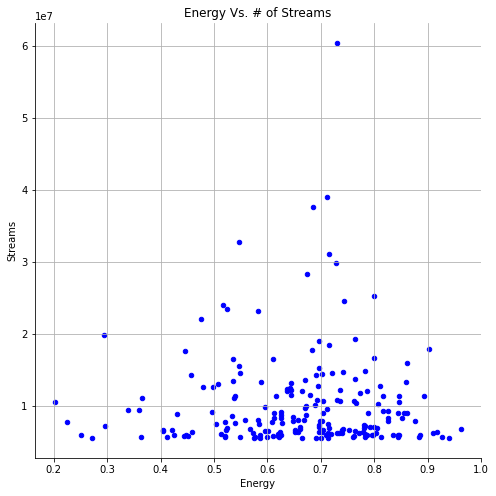

In [26]:
import scipy.stats as st
from matplotlib.pylab import rcParams
import seaborn as sns
rcParams['figure.figsize'] = 12,8
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

#Looking at the relationship between tempo and danceability of global top songs 

#make the columns in question numeric 
temp_songs_df['energy'] = pd.to_numeric(temp_songs_df['energy'])
temp_songs_df['streams'] = pd.to_numeric(temp_songs_df['streams'])

#create a scatter plot to see correlation between variables 
temp_songs_df.plot(kind="scatter", x="energy", y="streams", c = ['blue'], grid=True, figsize=(8,8),
              title="Energy Vs. # of Streams")

#find correlation between the variables and print
energy = temp_songs_df.iloc[:,7]
streams = temp_songs_df.iloc[:,5]
correlation = st.pearsonr(energy,streams)
print(f"The correlation between energy and streams is {(correlation)}")

plt.xlabel('Energy')
plt.ylabel('Streams')

#save the graph to the images folder 
plt.savefig('images/Energy_vs_Streams')


#display the graph with the correlation number 

plt.show()

C:\Users\maite\AppData\Local\Temp/ipykernel_14424/3813665565.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_songs_df['liveness'] = pd.to_numeric(temp_songs_df['liveness'])
C:\Users\maite\AppData\Local\Temp/ipykernel_14424/3813665565.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_songs_df['streams'] = pd.to_numeric(temp_songs_df['streams'])


IndexError: single positional indexer is out-of-bounds

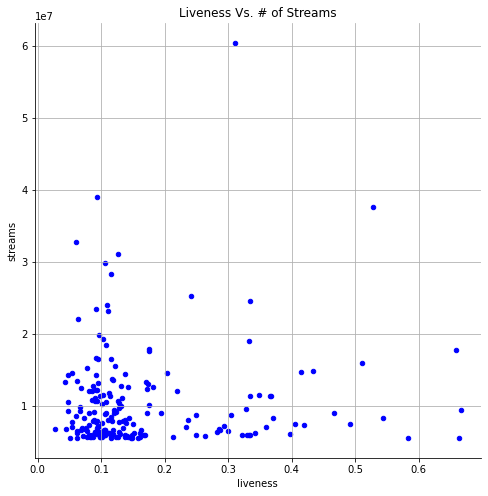

In [28]:
import scipy.stats as st
from matplotlib.pylab import rcParams
import seaborn as sns
rcParams['figure.figsize'] = 12,8
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

#Looking at the relationship between tempo and danceability of global top songs 

#make the columns in question numeric 
temp_songs_df['liveness'] = pd.to_numeric(temp_songs_df['liveness'])
temp_songs_df['streams'] = pd.to_numeric(temp_songs_df['streams'])

#create a scatter plot to see correlation between variables 
temp_songs_df.plot(kind="scatter", x="liveness", y="streams", c = ['blue'], grid=True, figsize=(8,8),
              title="Liveness Vs. # of Streams")

#find correlation between the variables and print
liveness = temp_songs_df.iloc[:,8]
streams = temp_songs_df.iloc[:,5]
correlation = st.pearsonr(liveness,streams)
print(f"The correlation between liveness and streams is {(correlation)}")

plt.xlabel('Liveness')
plt.ylabel('Streams')

#save the graph to the images folder 
plt.savefig('images/Liveness_vs_Streams')


#display the graph with the correlation number 

plt.show()